# Pandas

[Pandas](https://pandas.pydata.org/) is a popular Python library for data manipulation and analysis. It offers a wide range of data structures and functions that are essential for working with structured data. One of the common aliases for importing Pandas is `pd`. With Pandas, you can efficiently manage, clean, transform, and analyze data, making it a valuable tool for data scientists, analysts, and engineers.

# Matplotlib.pyplot

[Matplotlib.pyplot](https://matplotlib.org/stable/api/pyplot_summary.html) is a powerful Python library used for creating 2D graphics and visualizations. It can be employed in various Python environments, including scripts, interactive shells, web applications, and graphical user interface toolkits. The common alias for importing Matplotlib's `pyplot` module is `plt`. Matplotlib is widely used for generating charts, plots, and graphs, making it an essential tool for data visualization and presentation.

# NumPy

[NumPy](https://numpy.org/) is a fundamental library for the Python programming language. It enhances Python's capabilities by providing support for large, multi-dimensional arrays and matrices. NumPy also includes an extensive collection of high-level mathematical functions designed to operate efficiently on these arrays. A common alias for importing NumPy is `np`. This library is crucial for numerical computing, scientific computing, and data analysis tasks, as it allows for efficient handling of numerical data and mathematical operations in Python.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler



The code below reads the data from the CSV file `source file` using Pandas and displays the first few rows of the DataFrame using `df.head()`.


In [32]:
file_path = "data.csv"
df = pd.read_csv(file_path)
df.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,NaN,0.930108


## Description of the dataset

- COUNTRY: Name of the country
- CODE_TIME: A code that represents the month and year (e.g., JAN2010 for January 2010)
- TIME: The month and year in a more human-readable format (e.g., January 2010)
- YEAR: The year of the data point
- MONTH: The month of the data point as a number (1-12)
- MONTH_NAME: The month of the data point as a string (e.g., January)
- PRODUCT: The type of energy product (e.g., Hydro, Wind, Solar)
- VALUE: The amount of electricity generated in gigawatt-hours (GWh)
- DISPLAY_ORDER: The order in which the products should be displayed
- yearToDate: The amount of electricity generated for the current year up to the current month in GWh
- previousYearToDate: The amount of electricity generated for the previous year up to the current month in GWh
- share: The share of the product in the total electricity generation for the country in decimal format



In [33]:
print("Number of rows:", df.shape[0])
print("Number of Features:", df.shape[1])

Number of rows: 181915
Number of Features: 12


In [34]:
df['COUNTRY'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'IEA Total', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'OECD Americas',
       'OECD Asia Oceania', 'OECD Europe', 'OECD Total', 'Poland',
       'Portugal', 'Republic of Turkiye', 'Slovak Republic', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
       'United States', 'Colombia', 'Argentina', 'Brazil', 'Bulgaria',
       'Croatia', 'Cyprus', 'India', 'Malta', 'North Macedonia',
       'Romania', 'Serbia', 'Costa Rica'], dtype=object)

In [35]:
valueOfCountry = df[['COUNTRY', 'VALUE']].groupby(['COUNTRY']).sum()
scaler = MinMaxScaler()
# Normalize 'VALUE' in 'valueOfCountry'
valueOfCountry['VALUE_normalized'] = scaler.fit_transform(valueOfCountry[['VALUE']])
valueOfCountry.head()

,VALUE,VALUE_normalized
COUNTRY,,
Argentina,7.291167e+06,0.007777
Australia,2.182063e+07,0.023498
Austria,6.162604e+06,0.006555
Belgium,7.404547e+06,0.007899
Brazil,2.909683e+07,0.031372


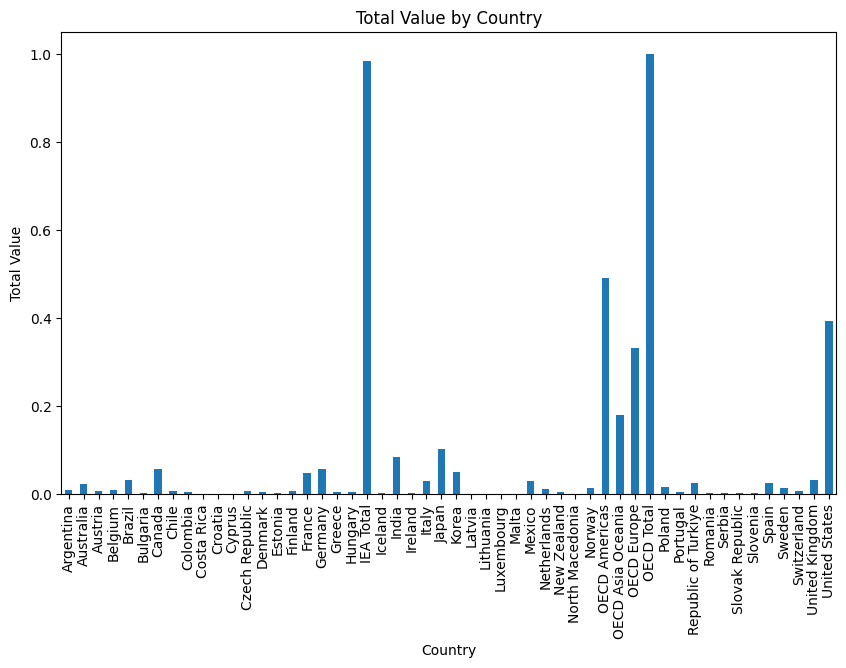

In [36]:
plt.figure(figsize=(10, 6))
valueOfCountry['VALUE_normalized'].plot(kind='bar')
plt.title('Total Value by Country')
plt.xlabel('Country')
plt.ylabel('Total Value')
plt.xticks()  # Rotate x-axis labels for better readability
plt.show()

- `df.drop_duplicates(inplace=True)` is a Pandas method that removes duplicate rows from the DataFrame `df`. The `inplace=True` parameter ensures that the changes are applied directly to the DataFrame without the need to create a new DataFrame.

- After removing the duplicates, the code prints the number of rows in the DataFrame with the message "Number of rows after removing duplicates:". The `df.shape[0]` attribute is used to retrieve the number of rows in the DataFrame. This provides information about the size of the DataFrame after duplicate rows have been removed.


In [37]:
df.drop_duplicates(inplace=True)
print("Number of rows after removing duplcates:", df.shape[0])

Number of rows after removing duplcates: 181915
